dự đoán chứng khoáng 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# khai báo thư viện 
import pandas as pd # đọc dữ liệu 
import matplotlib.pyplot as plt # vẽ đồ thị 
import numpy as np #xử lí dữ liệu
from sklearn.preprocessing import MinMaxScaler # chuẩn hoá dữ liệu 
from keras.callbacks import ModelCheckpoint # lưu lại huấn luyện tốt nhất 
from keras.models import load_model # tải mô hình 
from sklearn.model_selection import train_test_split # chia tập dữ liệu 

#các lớp để xay dựng mô hình 
from keras.models import Sequential # đầu vào 
from keras.layers import * #tạo layers và output

# khiểm tra độ chính xác
from sklearn.metrics import r2_score # đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error # đo sai số tuyệt đối trung bình 
from sklearn.metrics import mean_absolute_percentage_error # đo phầm trăm sau số tuyệt đối trung bình 


In [ ]:
file_path = '/content/drive/MyDrive/AI_cuoi_ ki/co_phieu.csv'
df = pd.read_csv(file_path)

In [ ]:
df['ngay'] = pd.to_datetime(df['ngay'], format='%d/%m/%Y')


In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
# lấy dữ liệu cột ngày và đóng cửa
dataf=pd.DataFrame(df,columns=['ngay','dong cua'])
dataf.index=dataf.ngay
dataf.drop('ngay',axis=1,inplace=True)

In [ ]:
dataf.head()

In [ ]:
#lập biểu đồ giá trị đóng cửa
plt.figure(figsize=(10,5))
plt.plot(dataf['dong cua'],label='gia thuc te',color='red')
plt.xlabel('thoi gian')
plt.ylabel('gia dong cua')
plt.show()

In [ ]:
#chia tập giữ liệu 
data=dataf.values # chuyển thành mảng np
train=data[:1000]
test= data[1000:]
data

In [ ]:
# chia tỉ lệ với min-max từ 0-1
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(data)

In [ ]:
# tạo vòng lặp các giá trị 
x_train,y_train=[],[]
for i in range(50,len(train)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

In [ ]:
# x_train

In [ ]:
#y_train

In [ ]:
# sắp xếp lại thành 1 mảng 
x_train=np.array(x_train)
y_train=np.array(y_train)
# sắp sếp lại thành mảng 1 chiều 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))
print(x_train.shape) 
print(y_train.shape)

In [ ]:
# Xây dựng mô hình RNN
model = Sequential()
model.add(LSTM(units=128, input_shape=(x_train.shape[1], 1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))# bỏ qua đơn vị ngẫy nhiên để không học tủ 
model.add(Dense(1))# output 1 giá trị 

# Compile mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# huấn luyện mô hình 
save_model='save_model.h5' # lưu mô hình huấn luyện 
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
  #lưu lại mô hình tốt nhất và truyền vào danh dánh callbacks
model.fit(x_train, y_train, epochs=200, batch_size=64,verbose=2,callbacks=[best_model])

Epoch 1/200

Epoch 1: loss improved from inf to 0.04048, saving model to save_model.h5
15/15 - 12s - loss: 0.0405 - 12s/epoch - 777ms/step
Epoch 2/200

Epoch 2: loss improved from 0.04048 to 0.00597, saving model to save_model.h5
15/15 - 5s - loss: 0.0060 - 5s/epoch - 320ms/step
Epoch 3/200

Epoch 3: loss improved from 0.00597 to 0.00547, saving model to save_model.h5
15/15 - 4s - loss: 0.0055 - 4s/epoch - 276ms/step
Epoch 4/200

Epoch 4: loss improved from 0.00547 to 0.00469, saving model to save_model.h5
15/15 - 5s - loss: 0.0047 - 5s/epoch - 315ms/step
Epoch 5/200

Epoch 5: loss improved from 0.00469 to 0.00402, saving model to save_model.h5
15/15 - 6s - loss: 0.0040 - 6s/epoch - 372ms/step
Epoch 6/200

Epoch 6: loss did not improve from 0.00402
15/15 - 4s - loss: 0.0042 - 4s/epoch - 285ms/step
Epoch 7/200

Epoch 7: loss improved from 0.00402 to 0.00390, saving model to save_model.h5
15/15 - 4s - loss: 0.0039 - 4s/epoch - 249ms/step
Epoch 8/200

Epoch 8: loss improved from 0.00390 t

KeyboardInterrupt: ignored

In [ ]:
# dữ liệu train 
y_train=sc.inverse_transform(y_train)# giá thực 
final_model=load_model('save_model.h5')
y_train_predict=final_model.predict(x_train)
# chuẩn hoá dữ liệu về dạng ban đầu 
y_train_predict=sc.inverse_transform(y_train_predict)# giá dự đoán 

30/30 [==============================] - 2s 33ms/step


In [ ]:
# sử lí dữ liệu test
test=dataf[len(train)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# dữ liệu test
y_test=data[1000:]
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict) # giá dự đoán 

8/8 [==============================] - 0s 34ms/step


<ipython-input-46-b13a851e0e43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['dự đoán']=y_train_predict
<ipython-input-46-b13a851e0e43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['dự đoán']=y_test_predict


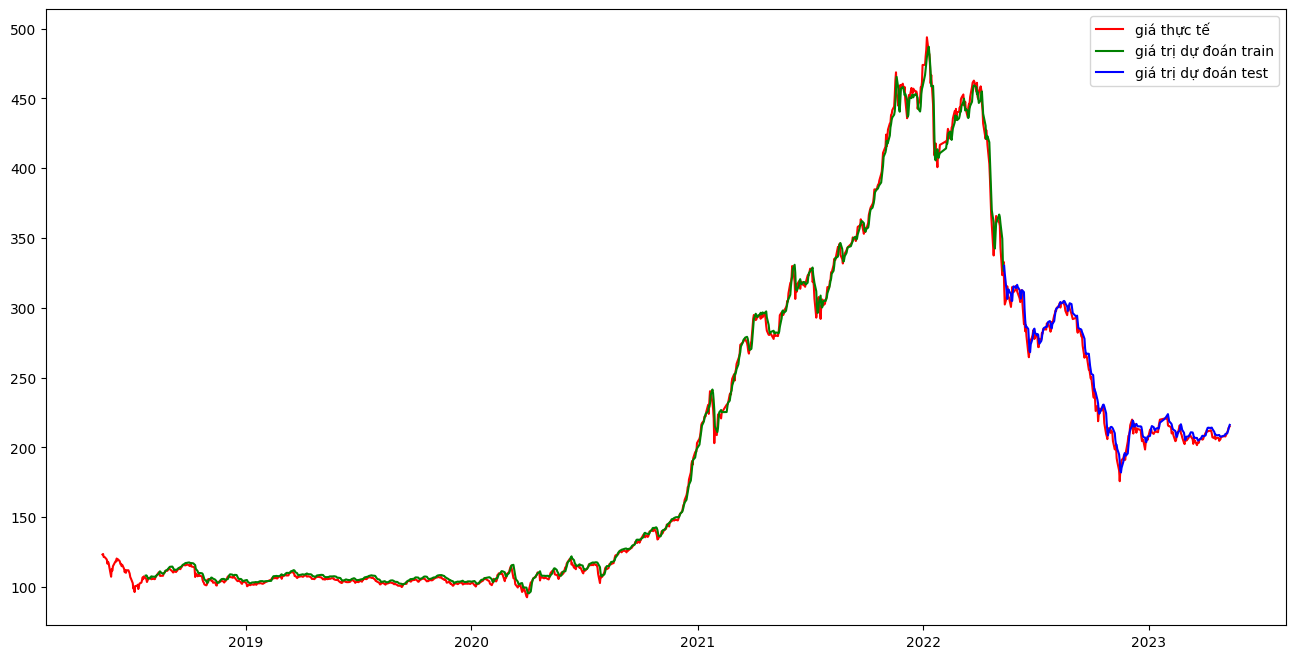

In [ ]:
# biểu đồ so sánh 
train_data=dataf[50:1000]
test_data=dataf[1000:]

plt.figure(figsize=(16,8))
plt.plot(dataf,label='giá thực tế',color='red')
train_data['dự đoán']=y_train_predict
plt.plot(train_data['dự đoán'],label='giá trị dự đoán train',color='green')
test_data['dự đoán']=y_test_predict
plt.plot(test_data['dự đoán'],label='giá trị dự đoán test',color='blue')
plt.legend()
plt.show()

In [ ]:
print('độ phù hợp tập train:',r2_score(y_train,y_train_predict))
print('sai số tuyệt đối trung bình tập train:',mean_absolute_error(y_train,y_train_predict))
print('phần trăm sai số trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

độ phù hợp tập train: 0.9987982211702862
sai số tuyệt đối trung bình tập train: 2.8146426313476582
phần trăm sai số trung bình tập train: 0.014769032934899763


In [ ]:
train_data

,dong cua,dự đoán
ngay,,
2018-07-23,106.300332,108.204651
2018-07-24,105.547209,108.321632
2018-07-25,103.584682,107.854424
2018-07-26,104.580533,106.662407
2018-07-27,105.703885,105.980370
...,...,...
2022-05-05,358.748490,365.123932
2022-05-06,343.458443,360.610840
2022-05-09,323.390122,349.417114


In [ ]:
print('độ phù hợp tập test:',r2_score(y_test,y_test_predict))
print('sai số tuyệt đối trung bình tập test:',mean_absolute_error(y_test,y_test_predict))
print('phần trăm sai số trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

độ phù hợp tập test: 0.9824354147790394
sai số tuyệt đối trung bình tập test: 3.984013769951443
phần trăm sai số trung bình tập test: 0.01680475890344154


In [ ]:
test_data

,dong cua,dự đoán
ngay,,
2022-05-12,315.522010,330.139404
2022-05-13,302.393738,324.578949
2022-05-16,307.051775,311.843414
2022-05-17,315.436722,306.409027
2022-05-18,309.840219,311.012970
...,...,...
2023-05-08,210.917793,210.112198
2023-05-09,211.947772,211.513626
2023-05-10,213.887861,213.099548


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/AI_cuoi_ ki/test.csv'
df = pd.read_csv(file_path)

dataf = pd.DataFrame(df, columns=['ngay', 'dong cua'])
dataf['ngay'] = pd.to_datetime(dataf['ngay'], format='%d/%m/%Y')
dataf = dataf.set_index('ngay')

# Lấy 30 ngày gần nhất
recent_data = dataf.tail(30)
recent_data_scaled = sc.transform(recent_data.values)

x_test = []
x_test.append(recent_data_scaled[-50:, 0])  # Lấy 50 ngày gần nhất để dự đoán ngày tiếp theo
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Tải mô hình đã lưu
from keras.models import load_model

final_model = load_model('save_model.h5')

# Dự đoán ngày tiếp theo
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)
